In [2]:
import os
import cpi
import pandas as pd
import altair as alt

By Ben Welsh - http://palewi.re/who-is-ben-welsh/

# Análise das disputas judiciais contra a cidade de Los Angeles

http://www.latimes.com/local/lanow/la-me-ln-city-payouts-20180627-story.html

In [2]:
# Formato do float

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Set input and ouput directories

In [8]:
input_dir = os.path.join(os.getcwd(), "input")
output_dir = os.path.join(os.getcwd(), "output")

 Uma lista de todos os pagamentos legais feitos pelo governo da cidade de Los Angeles 
 foi obtida do escritório do Procurador da Cidade, Mike Feuer, através de um pedido sob a 
 Lei de Registros Públicos da Califórnia. Os dados que cobrem o ano fiscal mais recente estão incompletos. 
 Seus totais foram reunidos em outros lugares, entrevistando autoridades municipais.

In [11]:
raw_df = pd.read_excel(
    os.path.join(input_dir, "payouts.xlsx"),
    skiprows=1,
    skipfooter=2,
    dtype={"FISCAL YEAR": int}
)

In [12]:
# skiprows -> ignora o cabeçalho

In [13]:
# skipfooter -> ignora as duas linhas finais do rodapé

In [14]:
raw_df.reset_index().head()

,index,FISCAL YEAR,CASE NAME,CLAIM # / CASE #,AMOUNT,DEPARTMENT,CASE TYPE
0,0,2006,COLLEEN KEOUGH,C05-4569,868.00,Department of Transportation,Traffic Accident - Failed to Stop/Yield
1,1,2006,CITY OF SANTA MONICA,C06-2282,572.00,Police Department,Traffic Accident - Rear Ended
2,2,2006,CLARA CECENA,C06-3069,17.00,Public Works / Bureau of Sanitation,Traffic Accident - Other
3,3,2006,CLARENCE CHANCE,C92-3656,"88,920.00",Police Department,Police - False Arrest/Detention/Imprisonment
4,4,2006,CLASSIC C HOBBS,C06-2691,"1,325.00",Public Works / Bureau of Sanitation,Traffic Accident - Failed to Stop/Yield


In [12]:
# Renomeia colunas

In [15]:
columns = {
    "FISCAL YEAR": "fiscal_year",
    "CASE NAME": "name",
    "CLAIM # / CASE #": "number",
    "AMOUNT": "amount",
    "DEPARTMENT": "department", 
    "CASE TYPE": "type"
}

In [16]:
df = raw_df.rename(columns=columns)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18701 entries, 0 to 18700
Data columns (total 6 columns):
fiscal_year    18701 non-null int64
name           18699 non-null object
number         18398 non-null object
amount         18701 non-null float64
department     18701 non-null object
type           18701 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 876.7+ KB


In [18]:
# Retira espaços e deixa em maiúscula

In [19]:
df['name'] = df.name.str.strip()
df['number'] = df.number.str.strip()
df['department'] = df.department.str.strip().str.upper()
df['type'] = df.type.str.strip()

In [20]:
df.reset_index().head()

,index,fiscal_year,name,number,amount,department,type
0,0,2006,COLLEEN KEOUGH,C05-4569,868.00,DEPARTMENT OF TRANSPORTATION,Traffic Accident - Failed to Stop/Yield
1,1,2006,CITY OF SANTA MONICA,C06-2282,572.00,POLICE DEPARTMENT,Traffic Accident - Rear Ended
2,2,2006,CLARA CECENA,C06-3069,17.00,PUBLIC WORKS / BUREAU OF SANITATION,Traffic Accident - Other
3,3,2006,CLARENCE CHANCE,C92-3656,"88,920.00",POLICE DEPARTMENT,Police - False Arrest/Detention/Imprisonment
4,4,2006,CLASSIC C HOBBS,C06-2691,"1,325.00",PUBLIC WORKS / BUREAU OF SANITATION,Traffic Accident - Failed to Stop/Yield


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18701 entries, 0 to 18700
Data columns (total 6 columns):
fiscal_year    18701 non-null int64
name           18699 non-null object
number         18398 non-null object
amount         18701 non-null float64
department     18701 non-null object
type           18701 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 876.7+ KB


Padronize as muitas variações no campo de tipos usando uma crosswalk personalizada. Nossas classificações foram submetidas aos funcionários da Procuradoria da Cidade para revisão. Eles não ofereciam correções ou comentários.

In [22]:
case_types = pd.read_csv(os.path.join(input_dir, "casetypes.csv"))

In [23]:
case_types.reset_index().head()

,index,type,latimes_type
0,0,Americans with Disability Act (ADA),Americans with Disability Act
1,1,Civil Rights - Not otherwise classified,Civil Rights
2,2,Civil Rights - Not Otherwise Classified,Civil Rights
3,3,Civil Rights/Regulatory Takings,Civil Rights
4,4,First Amendment/Free Speech,Civil Rights


 Faz um merge de df com case_types pela coluna type e inner é a interseção de chaves de ambos os quadros

In [24]:
df = df.merge(case_types, on="type", how="inner")

In [25]:
df.reset_index().head()

,index,fiscal_year,name,number,amount,department,type,latimes_type
0,0,2006,COLLEEN KEOUGH,C05-4569,868.00,DEPARTMENT OF TRANSPORTATION,Traffic Accident - Failed to Stop/Yield,Traffic Accident
1,1,2006,CLASSIC C HOBBS,C06-2691,"1,325.00",PUBLIC WORKS / BUREAU OF SANITATION,Traffic Accident - Failed to Stop/Yield,Traffic Accident
2,2,2006,CHUN JOON LEE,C06-2413,"2,625.00",POLICE DEPARTMENT,Traffic Accident - Failed to Stop/Yield,Traffic Accident
3,3,2006,CONNIE F ORTEGA,C05-5626,958.00,PUBLIC WORKS / BUREAU OF SANITATION,Traffic Accident - Failed to Stop/Yield,Traffic Accident
4,4,2006,CORNELL THIBOADUX,PC035066,"9,104.00",DEPARTMENT OF RECREATION AND PARKS,Traffic Accident - Failed to Stop/Yield,Traffic Accident


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18701 entries, 0 to 18700
Data columns (total 7 columns):
fiscal_year     18701 non-null int64
name            18699 non-null object
number          18398 non-null object
amount          18701 non-null float64
department      18701 non-null object
type            18701 non-null object
latimes_type    18701 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


Padronize as variações nos nomes dos departamentos da cidade.

In [27]:
departments = pd.read_csv(os.path.join(input_dir, "departments.csv"))

In [28]:
departments.reset_index().head()

,index,department,latimes_department
0,0,AGING DEPARTMENT,AGING
1,1,ANIMAL SERVICES,ANIMAL SERVICES
2,2,BUILDING AND SAFETY DEPARTMENT,BUILDING AND SAFETY
3,3,CITY ADMINISTRATIVE OFFICER,CITY ADMINISTRATIVE OFFICER
4,4,CITY ATTORNEY,CITY ATTORNEY


In [29]:
df = df.merge(departments, on="department", how="inner")

In [30]:
df.reset_index().head()

,index,fiscal_year,name,number,amount,department,type,latimes_type,latimes_department
0,0,2006,COLLEEN KEOUGH,C05-4569,868.00,DEPARTMENT OF TRANSPORTATION,Traffic Accident - Failed to Stop/Yield,Traffic Accident,TRANSPORTATION
1,1,2006,CHRISTINE JEFFERSON,C05-3347,"2,845.00",DEPARTMENT OF TRANSPORTATION,Traffic Accident - Failed to Stop/Yield,Traffic Accident,TRANSPORTATION
2,2,2006,CHU YUAN WANG,C06-3191,"5,751.00",DEPARTMENT OF TRANSPORTATION,Traffic Accident - Failed to Stop/Yield,Traffic Accident,TRANSPORTATION
3,3,2006,HAYDEE PAVON,C06-2222,759.00,DEPARTMENT OF TRANSPORTATION,Traffic Accident - Failed to Stop/Yield,Traffic Accident,TRANSPORTATION
4,4,2006,J GUERRERO AND G NIETO,C06-1110,351.00,DEPARTMENT OF TRANSPORTATION,Traffic Accident - Failed to Stop/Yield,Traffic Accident,TRANSPORTATION


Verifique se a contagem de linhas está inalterada após a entrada nas crosswalks

In [32]:
assert len(raw_df) == len(df)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18701 entries, 0 to 18700
Data columns (total 8 columns):
fiscal_year           18701 non-null int64
name                  18699 non-null object
number                18398 non-null object
amount                18701 non-null float64
department            18701 non-null object
type                  18701 non-null object
latimes_type          18701 non-null object
latimes_department    18701 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


# Análises

### Qual é o número total de pagamentos?

In [33]:
len(df)

18701

### No total, quanto dinheiro foi pago?

In [34]:
"${:,.0f}".format(df.amount.sum())

'$880,687,820'

### Quais são as outras estatísticas descritivas?

In [35]:
df.amount.describe().reset_index()

,index,amount
0,count,"18,701.00"
1,mean,"47,093.09"
2,std,"556,335.14"
3,min,"-1,500,000.00"
4,25%,600.00
5,50%,"1,917.00"
6,75%,"6,300.00"
7,max,"45,789,960.62"


### Quantos pagamentos foram feitos a cada ano?

In [38]:
annual_totals = df.groupby("fiscal_year").agg(dict(
    amount="sum",
    number="count"
)).reset_index().set_index("fiscal_year")

In [39]:
annual_totals.reset_index().head()

,fiscal_year,amount,number
0,2006,"37,206,924.00",1468
1,2007,"30,593,290.00",1551
2,2008,"36,637,836.00",1616
3,2009,"36,750,732.00",1320
4,2010,"90,536,467.00",1500


In [40]:
annual_totals['average'] = annual_totals.apply(lambda x: x['amount'] / float(x['number']), axis=1)

In [41]:
annual_totals.reset_index().head()

,fiscal_year,amount,number,average
0,2006,"37,206,924.00",1468,"25,345.32"
1,2007,"30,593,290.00",1551,"19,724.88"
2,2008,"36,637,836.00",1616,"22,671.93"
3,2009,"36,750,732.00",1320,"27,841.46"
4,2010,"90,536,467.00",1500,"60,357.64"


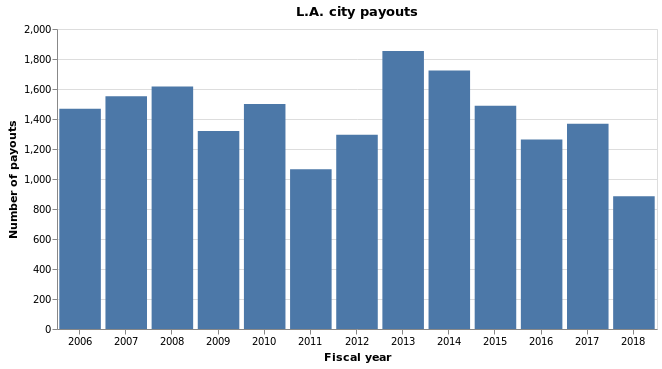

In [42]:
alt.Chart(annual_totals.reset_index(), title="L.A. city payouts").mark_bar().encode(
    x=alt.X("fiscal_year:O", axis=alt.Axis(title="Fiscal year", labelAngle=0)),
    y=alt.Y("number:Q", axis=alt.Axis(title="Number of payouts")),
).properties(width=600)

Estatísticas

In [43]:
annual_totals.number.describe().reset_index()

,index,number
0,count,13.00
1,mean,"1,415.23"
2,std,260.38
3,min,885.00
4,25%,"1,295.00"
5,50%,"1,468.00"
6,75%,"1,551.00"
7,max,"1,854.00"


Totais por ano

In [44]:
annual_totals[['number']]

,number
fiscal_year,
2006,1468
2007,1551
2008,1616
2009,1320
2010,1500
2011,1065
2012,1295
2013,1854
2014,1723


# Qual é o custo anual?

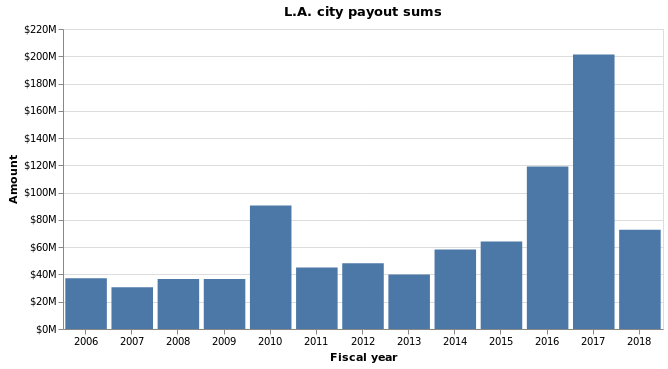

In [45]:
alt.Chart(annual_totals.reset_index(), title="L.A. city payout sums").mark_bar().encode(
    x=alt.X("fiscal_year:O", axis=alt.Axis(title="Fiscal year", labelAngle=0)),
    y=alt.Y("amount:Q", axis=alt.Axis(title="Amount", format="$s")),
).properties(width=600)

In [46]:
annual_totals.amount.describe().reset_index()

,index,amount
0,count,13.00
1,mean,"67,745,216.90"
2,std,"47,480,404.12"
3,min,"30,593,290.00"
4,25%,"37,206,924.00"
5,50%,"48,298,045.00"
6,75%,"72,829,596.81"
7,max,"201,372,336.23"


In [47]:
annual_totals[['amount']]

,amount
fiscal_year,
2006,"37,206,924.00"
2007,"30,593,290.00"
2008,"36,637,836.00"
2009,"36,750,732.00"
2010,"90,536,467.00"
2011,"45,016,329.00"
2012,"48,298,045.00"
2013,"39,897,408.05"
2014,"58,345,556.09"


# Como o valor médio de pagamento mudou? 

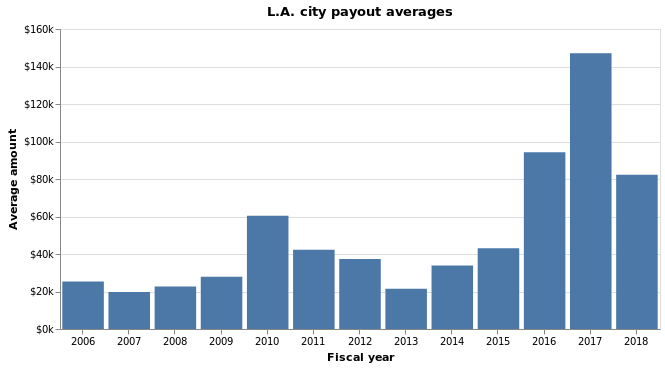

In [48]:
alt.Chart(annual_totals.reset_index(), title="L.A. city payout averages").mark_bar().encode(
    x=alt.X("fiscal_year:O", axis=alt.Axis(title="Fiscal year", labelAngle=0)),
    y=alt.Y("average:Q", axis=alt.Axis(title="Average amount", format="$s")),
).properties(width=600)

In [49]:
annual_totals[['average']]

,average
fiscal_year,
2006,"25,345.32"
2007,"19,724.88"
2008,"22,671.93"
2009,"27,841.46"
2010,"60,357.64"
2011,"42,268.85"
2012,"37,295.79"
2013,"21,519.64"
2014,"33,862.77"


# Como o ano de pico se compara a uma década antes?

In [50]:
"The peak year was {:.1f} times more than a decade before.".format(
    annual_totals.at[2017, "amount"] / annual_totals.at[2007, "amount"]
)

'The peak year was 6.6 times more than a decade before.'

# Quais departamentos são responsáveis pelo maior número de pagamentos?

In [51]:
dept_totals = df.groupby("latimes_department").agg(dict(
    number="count",
    amount="sum"
)).reset_index().set_index("latimes_department").sort_values(
    "amount",
    ascending=False
)

In [52]:
dept_totals['number_percent'] = dept_totals.number / len(df)
dept_totals['amount_percent'] = dept_totals.amount / df.amount.sum()

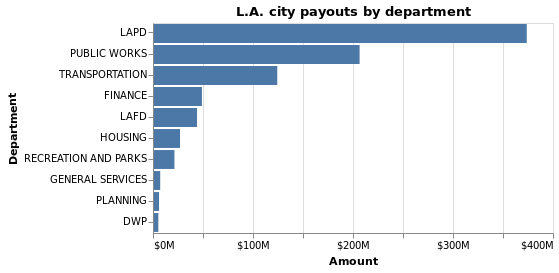

In [53]:
alt.Chart(dept_totals.reset_index().head(10), title="L.A. city payouts by department").mark_bar().encode(
    x=alt.X("amount:Q", axis=alt.Axis(title="Amount", format="$s")),
    y=alt.Y(
        "latimes_department:N",
        sort=alt.SortField(field="amount", op="sum", order="descending"),
        axis=alt.Axis(title="Department")
    )
)

In [54]:
dept_totals.head(10)

,number,amount,number_percent,amount_percent
latimes_department,,,,
LAPD,3824,"373,751,894.14",0.20,0.42
PUBLIC WORKS,11032,"206,591,227.33",0.59,0.23
TRANSPORTATION,992,"124,254,979.89",0.05,0.14
FINANCE,19,"48,946,060.83",0.00,0.06
LAFD,782,"44,034,102.46",0.04,0.05
HOUSING,33,"27,018,440.63",0.00,0.03
RECREATION AND PARKS,787,"21,446,942.95",0.04,0.02
GENERAL SERVICES,375,"7,209,380.11",0.02,0.01
PLANNING,43,"6,056,337.35",0.00,0.01


Escreva um CSV para um gráfico

In [55]:
dept_totals.to_csv(os.path.join(output_dir, "department-totals.csv"))

# Quais são as tendências para os principais departamentos?

In [56]:
top_dept_df = df[df.latimes_department.isin(['LAPD', 'PUBLIC WORKS', 'TRANSPORTATION'])]

In [57]:
top_dept_annual_totals = top_dept_df.groupby(["fiscal_year", 'latimes_department']).agg(dict(
    amount="sum",
)).reset_index()

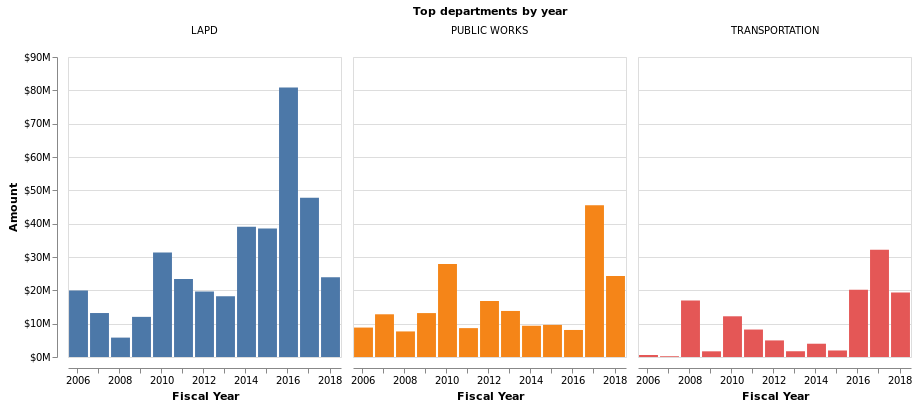

In [58]:
alt.Chart(top_dept_annual_totals).mark_bar().encode(
    x=alt.X("fiscal_year:O", axis=alt.Axis(title="Fiscal Year", labelAngle=0)),
    y=alt.Y("amount:Q", axis=alt.Axis(title="Amount", format="$s")),
    color=alt.Color("latimes_department:N", legend=None),
    column=alt.Column("latimes_department:N", title="Top departments by year"),
)

# Quais tipos de casos são responsáveis pelo maior número de pagamentos?

In [59]:
type_totals = df.groupby("latimes_type").agg(dict(
    number="count",
    amount="sum"
)).reset_index().set_index("latimes_type").sort_values(
    "amount",
    ascending=False
)

In [60]:
type_totals['number_percent'] = type_totals.number / len(df)
type_totals['amount_percent'] = type_totals.amount / df.amount.sum()

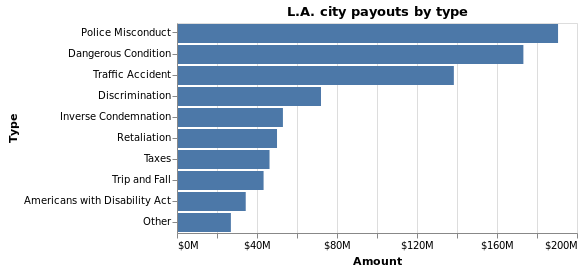

In [61]:
alt.Chart(type_totals.reset_index().head(10), title="L.A. city payouts by type").mark_bar().encode(
    x=alt.X("amount:Q", axis=alt.Axis(title="Amount", format="$s")),
    y=alt.Y(
        "latimes_type:N",
        sort=alt.SortField(field="amount", op="sum", order="descending"),
        axis=alt.Axis(title="Type")
    )
)

In [62]:
type_totals.head(10)

,number,amount,number_percent,amount_percent
latimes_type,,,,
Police Misconduct,457,"190,525,995.21",0.02,0.22
Dangerous Condition,4647,"173,189,941.24",0.25,0.20
Traffic Accident,9466,"138,422,936.03",0.51,0.16
Discrimination,199,"71,993,217.34",0.01,0.08
Inverse Condemnation,95,"52,959,034.57",0.01,0.06
Retaliation,89,"50,007,623.33",0.00,0.06
Taxes,4,"46,260,855.83",0.00,0.05
Trip and Fall,1764,"43,291,261.18",0.09,0.05
Americans with Disability Act,11,"34,361,805.96",0.00,0.04


In [63]:
type_totals.to_csv(os.path.join(output_dir, "type-totals.csv"))

# Quais as tendências para os tipos principais?

In [64]:
top_type_df = df[df.latimes_type.isin(['Police Misconduct', 'Dangerous Condition', 'Traffic Accident'])]

In [65]:
top_type_annual_totals = top_type_df.groupby(["fiscal_year", 'latimes_type']).agg(dict(
    amount="sum",
)).reset_index()

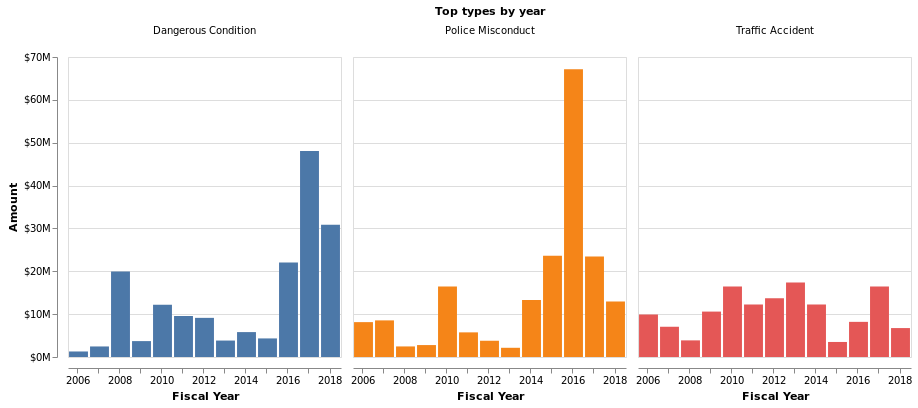

In [66]:
alt.Chart(top_type_annual_totals).mark_bar().encode(
    x=alt.X("fiscal_year:O", axis=alt.Axis(title="Fiscal Year", labelAngle=0)),
    y=alt.Y("amount:Q", axis=alt.Axis(title="Amount", format="$s")),
    color=alt.Color("latimes_type:N", legend=None),
    column=alt.Column("latimes_type:N", title="Top types by year"),
)

# Quantos casos de milhões de dólares ocorreram?

In [67]:
over1mill_df = df[df.amount >= 1000000]

In [68]:
over1mill_annual_counts = over1mill_df.groupby("fiscal_year").agg(dict(
    number="count"
)).reset_index().set_index("fiscal_year")

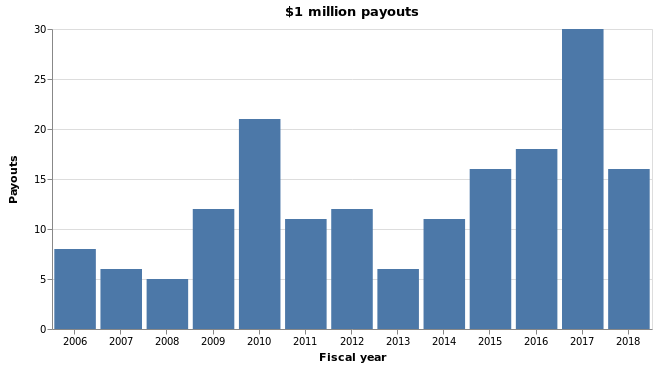

In [69]:
alt.Chart(over1mill_annual_counts.reset_index(), title="$1 million payouts").mark_bar().encode(
    x=alt.X("fiscal_year:O", axis=alt.Axis(title="Fiscal year", labelAngle=0)),
    y=alt.Y("number:Q", axis=alt.Axis(title="Payouts"))
).properties(width=600)

In [70]:
over1mill_annual_counts

,number
fiscal_year,
2006,8
2007,6
2008,5
2009,12
2010,21
2011,11
2012,12
2013,6
2014,11


# Correção pela inflação

Em uma entrevista, o procurador da cidade Mike Feuer levantou a possibilidade de que o aumento seria menos significativo se os totais fossem ajustados pela inflação. Vamos dar uma olhada.

In [71]:
df['amount_2017'] = df.apply(lambda x: cpi.inflate(x.amount, x.fiscal_year) if x.fiscal_year < 2018 else x.amount, axis=1)

In [72]:
annual_adjusted_totals = df.groupby("fiscal_year").agg(dict(
    amount_2017="sum"
)).reset_index().set_index("fiscal_year")

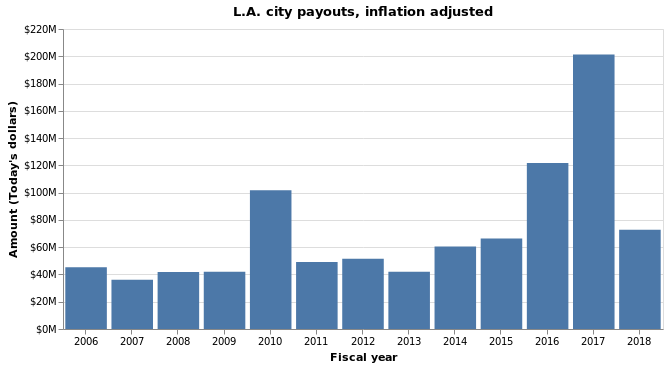

In [73]:
alt.Chart(annual_adjusted_totals.reset_index(), title="L.A. city payouts, inflation adjusted").mark_bar().encode(
    x=alt.X("fiscal_year:O", axis=alt.Axis(title="Fiscal year", labelAngle=0)),
    y=alt.Y("amount_2017:Q", axis=alt.Axis(title="Amount (Today's dollars)", format="$s")),
).properties(width=600)

In [74]:
"After adjusting for inflation, the peak year was {:.1f} times more than a decade before.".format(
    annual_adjusted_totals.at[2017, "amount_2017"] / annual_adjusted_totals.at[2007, "amount_2017"]
)

'After adjusting for inflation, the peak year was 5.6 times more than a decade before.'

In [75]:
annual_adjusted_totals

,amount_2017
fiscal_year,
2006,"45,238,894.90"
2007,"36,167,429.87"
2008,"41,711,756.74"
2009,"41,989,677.43"
2010,"101,773,392.12"
2011,"49,055,088.56"
2012,"51,564,138.39"
2013,"41,980,505.68"
2014,"60,411,862.62"
